In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('City_Zhvi_AllHomes.csv')
df2 = pd.read_fwf('University_towns.txt', header = None)
df3 = pd.read_excel('gdplev.xls')

In [3]:
df1.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [4]:
df2[0].unique()

array(['Alabama[edit]', 'Auburn (Auburn University)[1]',
       'Florence (University of North Alabama)',
       'Jacksonville (Jacksonville State University)[2]',
       'Livingston (University of West Alabama)[2]',
       'Montevallo (University of Montevallo)[2]',
       'Troy (Troy University)[2]',
       'Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]',
       'Tuskegee (Tuskegee University)[5]', 'Alaska[edit]',
       'Fairbanks (University of Alaska Fairbanks)[2]', 'Arizona[edit]',
       'Flagstaff (Northern Arizona University)[6]',
       'Tempe (Arizona State University)',
       'Tucson (University of Arizona)', 'Arkansas[edit]',
       'Arkadelphia (Henderson State University, Ouachita Baptist University)[2]',
       'Conway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]',
       'Fayetteville (University of Arkansas)[7]',
       'Jonesboro (Arkansas State University)[8]',
       'Magnolia (Southern Arkansas Universi

In [5]:
df3 = df3.drop(df3.columns[[0, 1, 2, 3, 7]], axis = 1)
# df3.columns = df3.iloc[4]
df3.head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN
1,Quarterly,NaN,NaN
2,(Seasonally adjusted annual rates),NaN,NaN
3,NaN,NaN,NaN
4,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars


In [6]:
df3 = df3[df3.index > 218]
df3.head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6
219,2000q1,10031,12359.1
220,2000q2,10278.3,12592.5
221,2000q3,10357.4,12607.7
222,2000q4,10472.3,12679.3
223,2001q1,10508.1,12643.3


In [7]:
df3.columns = ['Quater','GDP in billions of current dollars','GDP in billions of chained 2009 dollars']
df3 = df3.reset_index().drop('index', axis = 1)
# df3 = df3.rename(columns = {'NaN':'Quater'})
df3.head()

,Quater,GDP in billions of current dollars,GDP in billions of chained 2009 dollars
0,2000q1,10031,12359.1
1,2000q2,10278.3,12592.5
2,2000q3,10357.4,12607.7
3,2000q4,10472.3,12679.3
4,2001q1,10508.1,12643.3


# Question 1

In [8]:
import re 

state = ''
location = ''
StLo = []

for item in df2[0]:
    if len(re.split('\[ed', item)) >= 2 :
        state = re.split('\[', item)[0]
    else:
        location = re.split('\s\(', item)[0]
        StLo.append([state, location])
        
df5 = pd.DataFrame(StLo, columns = ['State', 'RegionName'])

df5

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
...,...,...
512,Wisconsin,River Falls
513,Wisconsin,Stevens Point
514,Wisconsin,Waukesha
515,Wisconsin,Whitewater


In [9]:
# import re 

# state = ''
# location = ''
# StLo = []

# for item in df2[0]:
#     if len(re.split('[a-z]\[', item)) >= 2 and len(re.split('\s\(', item)) < 2:
#         state = re.split('\[', item)[0]
#     else:
#         if len(re.split('\s\(', item)) >= 2:
#             location = re.split('\s\(', item)[0]
#             StLo.append([state, location])
        
# df5 = pd.DataFrame(StLo, columns = ['State', 'RegionName'])

# df5

In [10]:
# import re 

# state = ''
# location = ''
# StLo = []

# for item in df2[0]:
#     if len(re.split('[a-z]\[', item)) == 2:
#         state = re.split('[a-z]\[', item)[0]
#     else:
#         if len(re.split('\s\(', item)) == 2:
#             location = re.split('\s\(', item)[0]
#             StLo.append([state, location])
        
# df5 = pd.DataFrame(StLo, columns = ['State', 'RegionName'])

# df5

# Extra 

In [11]:
def location1(item):
    import re
    i = re.split('\s\(', item)
    if len(i) == 1:
        return None
    if len(i) == 2:
        return i[0]
        
def university(item):
    import re
    i = re.split('\s\(', item)
    j = re.split('\[', i[0])
    if len(i) == 1:
        return None
    if len(i) == 2:
        k = re.split('\)', i[1])
        return k[0]
    
# def State(item):
#     import re
#     if len(re.split('[a-z]\[', item)) == 2:
#         i = re.split('[a-z]\[', item)[0]
#         return i
    

In [12]:
# df2['State'] = df2[0].apply(State)
df2['Location'] = df2[0].apply(location1)
df2['University'] = df2[0].apply(university)
df2 = df2.drop(0, axis = 1)
# df2[0].apply(Namemod)

In [13]:
df2

,Location,University
0,None,None
1,Auburn,Auburn University
2,Florence,University of North Alabama
3,Jacksonville,Jacksonville State University
4,Livingston,University of West Alabama
...,...,...
562,Stevens Point,University of Wisconsinâ€“Stevens Point
563,Waukesha,Carroll University
564,Whitewater,University of Wisconsinâ€“Whitewater
565,None,None


In [14]:
def location2(item):
    import re
    i = re.split('\s\(', item)
    return i[0]

df1['RegionName'] = df1['RegionName'].apply(location2)
df1.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [15]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
for item in df1['State'].unique():
    df1.loc[df1['State'] == item, 'State'] = states[item]

In [16]:
df1.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,New York,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,California,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,Illinois,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,Pennsylvania,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,Arizona,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [17]:
# df1 = df1[['RegionName', 'State']]

In [18]:
df1

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,New York,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,California,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,Illinois,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,Pennsylvania,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,Arizona,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,398292,Town of Wrightstown,Wisconsin,Green Bay,Brown,10726,NaN,NaN,NaN,NaN,...,149900,150100,150300,150000,149200,149900,151400,152500,154100,155900
10726,398343,Urbana,New York,Corning,Steuben,10727,66900.0,65800.0,65500.0,65100.0,...,135700,136400,137700,138700,140500,143600,145000,144000,143000,143000
10727,398496,New Denmark,Wisconsin,Green Bay,Brown,10728,NaN,NaN,NaN,NaN,...,188700,189800,190800,191200,191200,191700,192800,194000,196300,198900
10728,398839,Angels,California,NaN,Calaveras,10729,115600.0,116400.0,118000.0,119000.0,...,280400,279600,278000,276600,275000,273700,272000,269100,269000,270900


In [19]:
j = []
for i in df2['Location'].unique():
    j.append(df1[df1['RegionName'] == i])
df4 = pd.concat(j).reset_index().drop('index', axis = 1)

In [20]:
df4[df4['State'] == 'Michigan']

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
5,37007,Auburn,Michigan,Bay City,Bay,5196,74200.0,75400.0,77300.0,78700.0,...,109800,110000,110200,110400,110700,110700,111000,112400,113900,114800
25,7476,Troy,Michigan,Detroit,Oakland,416,173300.0,173300.0,173700.0,173900.0,...,267800,269600,271200,272500,273900,274800,274900,274900,275700,276700
100,8582,Grand Junction,Michigan,Kalamazoo,Van Buren,7322,33100.0,33300.0,33400.0,33500.0,...,98700,96900,94900,94000,95100,96900,98300,99800,101900,103400
124,33069,New Haven,Michigan,Detroit,Macomb,3541,125100.0,126300.0,127500.0,128200.0,...,148000,148400,148700,148700,148900,149600,150600,151600,152500,153000
167,37209,Athens,Michigan,Battle Creek,Calhoun,10058,64200.0,64200.0,64900.0,64900.0,...,94200,96200,97600,97100,96300,96800,97900,98800,99100,99000
225,38880,Hanover,Michigan,Jackson,Jackson,8437,66100.0,66500.0,65500.0,65400.0,...,103000,104100,103600,103700,105600,107800,109600,110800,112000,112900
235,33654,Richmond,Michigan,Detroit,Macomb,3659,134900.0,136800.0,138200.0,139000.0,...,165800,166100,166400,167800,169100,169500,169400,169500,169800,170500
252,169009,Waverly,Michigan,Lansing,Eaton,2544,99500.0,102000.0,103800.0,104500.0,...,136600,137000,137400,138100,138800,139400,139900,140000,140300,140600
262,39382,Lawrence,Michigan,Kalamazoo,Van Buren,6505,NaN,NaN,NaN,NaN,...,108200,112400,114500,116200,117600,118300,119400,120800,121400,121900
341,43987,Augusta,Michigan,Kalamazoo,Kalamazoo,10441,NaN,NaN,NaN,NaN,...,171400,172000,171800,171200,171100,171900,173700,176600,179600,181700


In [21]:
df4

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,16839,Auburn,Washington,Seattle,King,608,130100.0,130100.0,131000.0,131900.0,...,285200,286900,289300,292300,295200,298400,301800,305000,308100,310600
1,50800,Auburn,California,Sacramento,Placer,1022,159600.0,161000.0,162300.0,163800.0,...,382900,383700,383500,383400,384600,386200,387500,388500,390200,392100
2,37219,Auburn,New York,Auburn,Cayuga,1523,53200.0,52300.0,52200.0,52100.0,...,82200,82800,83300,83500,83500,83600,83600,83800,84200,84600
3,37217,Auburn,Indiana,Auburn,De Kalb,2179,82700.0,84600.0,86000.0,87100.0,...,131500,129500,128300,127500,127300,127500,127300,127000,127300,127800
4,10206,Auburn,Massachusetts,Worcester,Worcester,2517,109300.0,108800.0,108400.0,108100.0,...,225200,226900,227700,228300,229100,229700,230200,230200,231100,232300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,5976,Milwaukee,Wisconsin,Milwaukee,Milwaukee,24,68100.0,68100.0,68100.0,67800.0,...,94600,94300,94200,94600,95200,95900,96300,96900,98200,99500
859,53752,Oshkosh,Wisconsin,Oshkosh,Winnebago,855,78200.0,78200.0,78100.0,78600.0,...,131500,132100,132100,131900,131700,132100,132900,133600,134200,135100
860,19981,Platteville,Colorado,Greeley,Weld,6300,97700.0,98300.0,98900.0,99500.0,...,209900,211400,211300,211100,212100,215500,219700,222800,224200,225300
861,34683,Waukesha,Wisconsin,Milwaukee,Waukesha,820,NaN,NaN,NaN,NaN,...,190500,190900,190500,190900,192000,193200,194200,194500,197000,201000


# Question 2

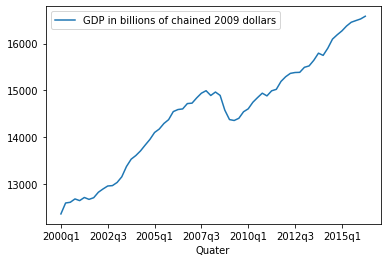

In [22]:
df3.head()

import matplotlib.pyplot as plt
%matplotlib inline
df3.plot(y = 'GDP in billions of chained 2009 dollars', x = 'Quater')

In [23]:
GDPlist = []
for item in df3['GDP in billions of chained 2009 dollars']:
    GDPlist.append(item)
for i in range(len(GDPlist)-4):
    if GDPlist[i+4] > GDPlist[i+3] > GDPlist[i+2] < GDPlist[i+1] < GDPlist[i]:
        print(df3.iloc[i+1]['Quater'])

2009q1


# Question 3

In [24]:
for i in range(len(GDPlist)-4):
    if GDPlist[i+4] > GDPlist[i+3] > GDPlist[i+2] < GDPlist[i+1] < GDPlist[i]:
        print(df3.iloc[i+4]['Quater'])

2009q4


# Question 5

In [25]:
df1 = df1.set_index(['State', 'RegionName'])

In [26]:
df1 = df1.drop(df1.columns[0:49], axis = 1)
df1.head()

,,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
California,Los Angeles,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,222800.0,224300.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
Illinois,Chicago,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,149000.0,150400.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
Pennsylvania,Philadelphia,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,54500.0,54700.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
Arizona,Phoenix,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,116500.0,117200.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [27]:
import numpy as np
for j in range(0,len(df1.columns),3):
    df1[str(re.split('\-', df1.columns[j])[0])+'q'+str((int(j/3)%4)+1)] = df1[df1.columns[j:j+3]].apply(lambda i : np.mean(i), axis = 1)

In [28]:
df1.head()

,,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.000000
California,Los Angeles,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,222800.0,224300.0,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,458388.888889
Illinois,Chicago,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,149000.0,150400.0,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,187466.666667
Pennsylvania,Philadelphia,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,54500.0,54700.0,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,103466.666667
Arizona,Phoenix,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,116500.0,117200.0,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,167411.111111


In [29]:
df1 = df1.drop(df1.columns[0:200], axis = 1)

In [30]:
df1.head()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.000000
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,458388.888889
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,187466.666667
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,103466.666667
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,167411.111111


# Question 6

In [31]:
GDPlist = []
for item in df3['GDP in billions of chained 2009 dollars']:
    GDPlist.append(item)
for i in range(len(GDPlist)-4):
    if GDPlist[i+4] > GDPlist[i+3] > GDPlist[i+2] < GDPlist[i+1] < GDPlist[i]:
        quarter_before_recession = df3.iloc[i-2]['Quater']
        recession_bottom = df3.iloc[i+2]['Quater']
        
quarter_before_recession
recession_bottom

'2009q2'

In [32]:
df1['Price ratio'] = df1[quarter_before_recession]/df1[recession_bottom]

In [33]:
df1 = df1['Price ratio']

In [34]:
list1 = []
for i in range(len(df5)):
    list1.append(list(df5.iloc[i]))

In [35]:
list1

[['Alabama', 'Auburn'],
 ['Alabama', 'Florence'],
 ['Alabama', 'Jacksonville'],
 ['Alabama', 'Livingston'],
 ['Alabama', 'Montevallo'],
 ['Alabama', 'Troy'],
 ['Alabama', 'Tuscaloosa'],
 ['Alabama', 'Tuskegee'],
 ['Alaska', 'Fairbanks'],
 ['Arizona', 'Flagstaff'],
 ['Arizona', 'Tempe'],
 ['Arizona', 'Tucson'],
 ['Arkansas', 'Arkadelphia'],
 ['Arkansas', 'Conway'],
 ['Arkansas', 'Fayetteville'],
 ['Arkansas', 'Jonesboro'],
 ['Arkansas', 'Magnolia'],
 ['Arkansas', 'Monticello'],
 ['Arkansas', 'Russellville'],
 ['Arkansas', 'Searcy'],
 ['California', 'Angwin'],
 ['California', 'Arcata'],
 ['California', 'Berkeley'],
 ['California', 'Chico'],
 ['California', 'Claremont'],
 ['California', 'Cotati'],
 ['California', 'Davis'],
 ['California', 'Irvine'],
 ['California', 'Isla Vista'],
 ['California', 'University Park, Los Angeles'],
 ['California', 'Merced'],
 ['California', 'Orange'],
 ['California', 'Palo Alto'],
 ['California', 'Pomona'],
 ['California', 'Redlands'],
 ['California', 'Rivers

In [36]:
list2 = []
list3 = []
for item in df1.index:
    if list(item) in list1:
        list2.append(df1.loc[item])
    else:
        list3.append(df1.loc[item])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


In [37]:
len(list2)

269

In [38]:
len(list3)

10461

In [39]:
df6 = pd.concat(list2)
df7 = pd.concat(list3)

In [40]:
np.mean(df6)

1.0545695636885497

In [41]:
np.mean(df7)

1.0729949656523317

In [42]:
if np.mean(df6) < np.mean(df7):
    better = 'university town'
else:
    better = 'non-university town'

In [43]:
from scipy import stats

In [44]:
i = stats.ttest_ind(df6, df7, nan_policy = 'omit')

In [45]:
i[0]

-2.718872941511165

In [46]:
i[1]

0.006561453317295008

In [47]:
if i[1] < 0.01:
    different = True
    p = i[1]
    print((different, p, better))

(True, 0.006561453317295008, 'university town')
